# Individual Assignment 4: Computational Code and Output
## Group 36: Sophia Oh 75663559

# Dataset

The dataset “Online News Popularity” summarizes a set of features about articles published by Mashable (a news and entertainment website). There are 39,797 observations and 61 variables (58 predictive attributes, 2 non-predictive, 1 goal field). A full list of the variables is provided below.
<br>
<br>
The data comes from the company Mashable and the articles they published from 2013 to 2015. The data was acquired on January 8th, 2015. Certain performance metrics were estimated using a Random Forest classifier (an algorithm that combines the output of multiple decision trees). Other variables, such as the rate of positive and negative words in an article, were measured by the authors. 

*Link to dataset*
<br>
https://archive.ics.uci.edu/dataset/332/online+news+popularity

| Column | Attribute Information | Meaning |
|--------|-----------------------|---------|
| 0      | url                   | URL of the article (non-predictive) |
| 1      | timedelta             | Days between the article publication and the dataset acquisition (non-predictive) |
| 2      | n_tokens_title        | Number of words in the title |
| 3      | n_tokens_content      | Number of words in the content |
| 4      | n_unique_tokens       | Rate of unique words in the content |
| 5      | n_non_stop_words      | Rate of non-stop words in the content |
| 6      | n_non_stop_unique_tokens | Rate of unique non-stop words in the content |
| 7      | num_hrefs             | Number of links |
| 8      | num_self_hrefs        | Number of links to other articles published by Mashable |
| 9      | num_imgs              | Number of images |
| 10     | num_videos            | Number of videos |
| 11     | average_token_length  | Average length of the words in the content |
| 12     | num_keywords          | Number of keywords in the metadata |
| 13     | data_channel_is_lifestyle | Is data channel 'Lifestyle'? |
| 14     | data_channel_is_entertainment | Is data channel 'Entertainment'? |
| 15     | data_channel_is_bus   | Is data channel 'Business'? |
| 16     | data_channel_is_socmed | Is data channel 'Social Media'? |
| 17     | data_channel_is_tech  | Is data channel 'Tech'? |
| 18     | data_channel_is_world | Is data channel 'World'? |
| 19     | kw_min_min            | Worst keyword (min. shares) |
| 20     | kw_max_min            | Worst keyword (max. shares) |
| 21     | kw_avg_min            | Worst keyword (avg. shares) |
| 22     | kw_min_max            | Best keyword (min. shares) |
| 23     | kw_max_max            | Best keyword (max. shares) |
| 24     | kw_avg_max            | Best keyword (avg. shares) |
| 25     | kw_min_avg            | Avg. keyword (min. shares) |
| 26     | kw_max_avg            | Avg. keyword (max. shares) |
| 27     | kw_avg_avg            | Avg. keyword (avg. shares) |
| 28     | self_reference_min_shares | Min. shares of referenced articles in Mashable |
| 29     | self_reference_max_shares | Max. shares of referenced articles in Mashable |
| 30     | self_reference_avg_shares | Avg. shares of referenced articles in Mashable |
| 31     | weekday_is_monday     | Was the article published on a Monday? |
| 32     | weekday_is_tuesday    | Was the article published on a Tuesday? |
| 33     | weekday_is_wednesday  | Was the article published on a Wednesday? |
| 34     | weekday_is_thursday   | Was the article published on a Thursday? |
| 35     | weekday_is_friday     | Was the article published on a Friday? |
| 36     | weekday_is_saturday   | Was the article published on a Saturday? |
| 37     | weekday_is_sunday     | Was the article published on a Sunday? |
| 38     | is_weekend            | Was the article published on the weekend? |
| 39     | LDA_00                | Closeness to LDA topic 0 |
| 40     | LDA_01                | Closeness to LDA topic 1 |
| 41     | LDA_02                | Closeness to LDA topic 2 |
| 42     | LDA_03                | Closeness to LDA topic 3 |
| 43     | LDA_04                | Closeness to LDA topic 4 |
| 44     | global_subjectivity   | Text subjectivity |
| 45     | global_sentiment_polarity | Text sentiment polarity |
| 46     | global_rate_positive_words | Rate of positive words in the content |
| 47     | global_rate_negative_words | Rate of negative words in the content |
| 48     | rate_positive_words   | Rate of positive words among non-neutral tokens |
| 49     | rate_negative_words   | Rate of negative words among non-neutral tokens |
| 50     | avg_positive_polarity | Avg. polarity of positive words |
| 51     | min_positive_polarity | Min. polarity of positive words |
| 52     | max_positive_polarity | Max. polarity of positive words |
| 53     | avg_negative_polarity | Avg. polarity of negative words |
| 54     | min_negative_polarity | Min. polarity of negative words |
| 55     | max_negative_polarity | Max. polarity of negative words |
| 56     | title_subjectivity    | Title subjectivity |
| 57     | title_sentiment_polarity | Title polarity |
| 58     | abs_title_subjectivity | Absolute subjectivity level |
| 59     | abs_title_sentiment_polarity | Absolute polarity level |
| 60     | shares                | Number of shares (target) |


# Question 

Our dataset has 60 variables that relate to characteristics of an article. We propose that some of these variables influence how many shares an article gets. Therefore, we will build a model to answer the question **“Among the characteristics of an article (`length`, `number of images`, `global_sentiment_polarity`, `global_rate_negative_words`, `global_rate_positive_words`, `avg_negative_polarity`, `avg_positive_polarity`, and `title_sentiment_polarity`), which factors tend to influence number of shares, and which variables build the best model to predict the number of shares?”** This is an **prediction question** that will analyze (number of) ***shares*** as the response variable. Shares are an integer between 0 and infinite, representing the number of times an article was shared on Facebook, Twitter, or Flipboard. Our model will help us select explanatory variables. 

The dataset will help us answer this question because our model will determine which variables are strongly associated with the number of shares. The list of variables above are **potential** explanatory variables, although our final report will include a model that uses a **data-driven approach** for choosing the best variables. 

In [1]:
library(tidyverse)
library(repr)
library(ggplot2)
library(moderndive)
library(gridExtra)
library(readxl)
library(infer)
library(cowplot)
library(GGally)
library(broom)
library(dplyr)
library(car)
library(tidymodels)
library(glmnet)
library(leaps)
library(faraway)
library(mltools)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    som

# Exploratory Data Analysis
## Reading the data

Dataset can be downloaded from the UCI Machine Learning Repository or from our group's github repository
<br>
- https://archive.ics.uci.edu/dataset/332/online+news+popularity
<br>
- https://github.com/jasonllai/Stat-301-project-t36, filename: OnlineNewsPopularity.csv

In [2]:
news_data <- read.csv('https://raw.githubusercontent.com/jasonllai/Stat-301-project-t36/main/OnlineNewsPopularity.csv', header = TRUE, sep = ",")
head(news_data, 5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5000000,-0.1875000,0.00000000,0.1875000,593
2,http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0000000,0.0000000,0.50000000,0.0000000,711
3,http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0000000,0.0000000,0.50000000,0.0000000,1500
4,http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5037879,1,0.6656347,9,0,1,⋯,0.13636364,0.8,-0.3696970,-0.600,-0.1666667,0.0000000,0.0000000,0.50000000,0.0000000,1200
5,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.4156456,1,0.5408895,19,19,20,⋯,0.03333333,1.0,-0.2201923,-0.500,-0.0500000,0.4545455,0.1363636,0.04545455,0.1363636,505


## Tidying the data

We will select `shares` as the response variable and possible explanatory variables such as `length`, `number of images`, `global_sentiment_polarity`, `global_rate_negative_words`, `global_rate_positive_words`, `avg_negative_polarity`, `avg_positive_polarity`, and `title_sentiment_polarity` are selected.
<br>

There are 39,644 articles in the dataset with no missing values.
<br>

Furthermore, the minimum number of shares is 1 and the maximum number of shares is 843,300.

In [3]:
articles <- subset(news_data, select = c(n_tokens_content, num_imgs, global_sentiment_polarity, global_rate_negative_words, global_rate_positive_words, rate_negative_words, rate_positive_words, avg_negative_polarity, avg_positive_polarity, title_sentiment_polarity, shares))
colnames(articles)[colnames(articles) == 'n_tokens_content'] <- 'length'
head(articles, 5)

#Finding the number of rows in the dataset
num_articles <- nrow(articles)
num_articles

#Checking for missing values
sum(is.na(articles))

#Finding the maximum number of shares
max_shares <- max(articles$shares)
max_shares

#Finding the minimum number of shares
min_shares <- min(articles$shares)
min_shares

,length,num_imgs,global_sentiment_polarity,global_rate_negative_words,global_rate_positive_words,rate_negative_words,rate_positive_words,avg_negative_polarity,avg_positive_polarity,title_sentiment_polarity,shares
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,219,1,0.09256198,0.013698630,0.04566210,0.2307692,0.7692308,-0.3500000,0.3786364,-0.1875000,593
2,255,1,0.14894781,0.015686275,0.04313725,0.2666667,0.7333333,-0.1187500,0.2869146,0.0000000,711
3,211,1,0.32333333,0.009478673,0.05687204,0.1428571,0.8571429,-0.4666667,0.4958333,0.0000000,1500
4,531,1,0.10070467,0.020715631,0.04143126,0.3333333,0.6666667,-0.3696970,0.3859652,0.0000000,1200
5,1072,20,0.28100348,0.012126866,0.07462687,0.1397849,0.8602151,-0.2201923,0.4111274,0.1363636,505


[1] 39644

[1] 0

[1] 843300

[1] 1

## Histogram of `shares`

As a part of our EDA, we wanted to look at the distribution of the response variable `shares`. We observed that the distribution is right-skewed, and that most articles got less than 10,000 shares. Furthermore, there are no zero values in the share column. Also, it should be noted that there are 820 rows removed from the graph because they fall to the very right of the histogram and their counts are very low. Since there are 39,644 rows, we can assume it is safe to ignore them here.

Warning message:
“Removed 818 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


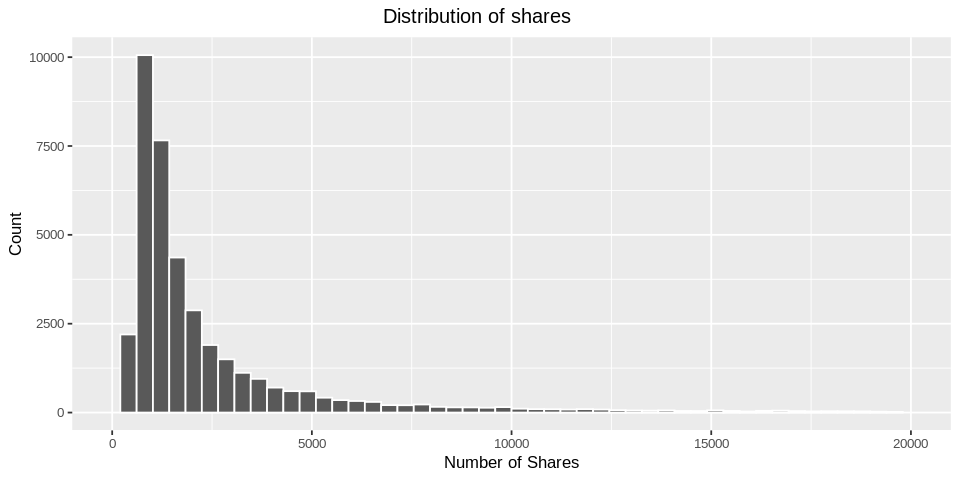

In [4]:
options(repr.plot.width = 8, repr.plot.height = 4)
shares_dist <- articles %>%
    ggplot(aes(x = shares)) +
    geom_histogram(bins = 50, color = "white") +
    xlim(0,20000) +
    labs(x = "Number of Shares", y = "Count") +
    ggtitle("Distribution of shares") +
    theme(text = element_text(size = 10)) +
    theme(plot.title = element_text(hjust = 0.45))
shares_dist

# Visualization

Due to how large our dataset is, I decided to take a random sample of `shares` before creating visualizations. See **Limitations** for further explanation.

In [5]:
set.seed(1)

article_sample <- rep_sample_n(articles, 4000, replace = FALSE)
head(article_sample, 5)

replicate,length,num_imgs,global_sentiment_polarity,global_rate_negative_words,global_rate_positive_words,rate_negative_words,rate_positive_words,avg_negative_polarity,avg_positive_polarity,title_sentiment_polarity,shares
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,293,1,0.23177083,0.003412969,0.03754266,0.08333333,0.9166667,-0.1250000,0.3484848,0.0000000,1500
1,173,1,0.22351190,0.000000000,0.05202312,0.00000000,1.0000000,0.0000000,0.2980159,0.2142857,5200
1,613,1,0.25461133,0.001631321,0.04730832,0.03333333,0.9666667,-0.2000000,0.4107628,0.1363636,4200
1,365,10,0.16703890,0.019178082,0.04383562,0.30434783,0.6956522,-0.3055556,0.3867965,0.0000000,686
1,683,1,0.03681869,0.027818448,0.03513909,0.44186047,0.5581395,-0.2584378,0.3034993,-0.1555556,1400


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 7 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (1-1,2-2) arrange gtable[arrange]

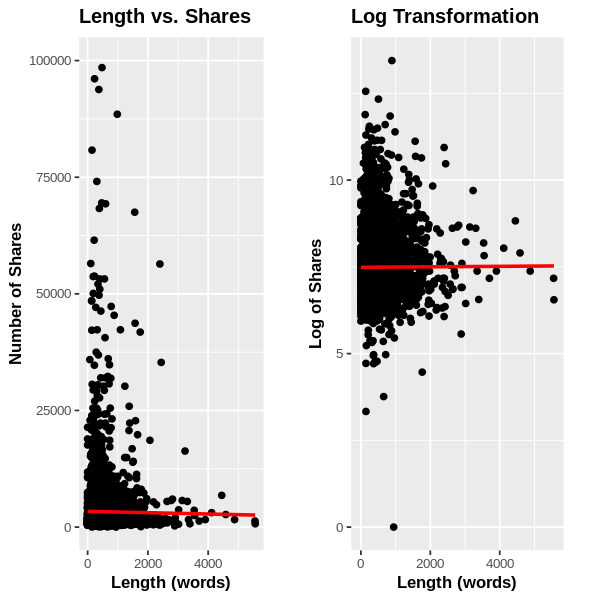

In [6]:
options(repr.plot.width = 5, repr.plot.height = 5)
article_length_plot <- ggplot(article_sample, aes(x = length, y = shares)) + 
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "red") + #Plotting the regression line
    xlab("Length (words)") + 
    ylab("Number of Shares") +
    labs(title = "Length vs. Shares") +
    scale_y_continuous(limits = c(0, 100000)) + #Removing outliers
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
        )

options(repr.plot.width = 5, repr.plot.height = 5)
log_shares <- ggplot(article_sample, aes(x = length, y = log(shares))) + 
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "red") + #Plotting the regression line
    xlab("Length (words)") + 
    ylab("Log of Shares") +
    labs(title = "Log Transformation") +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
        )

matrix <- grid.arrange(
  arrangeGrob(article_length_plot, widths = c(10, 1)),
  arrangeGrob(log_shares, widths = c(10, 1)),
  ncol = 2
)
matrix

# Explanation
I chose this matrix because it shows the correlation between the length of an article and the number of shares it got, as well as a log transformation of `shares`. This is relevant to our question because it looks at one potential explanatory variable `length` and if there is a linear or logarithmic relationship with `shares`. Because the `share` variable is a very large number, the log transformation reduces the effects of extreme values and makes patterns more interpretable. 

After plotting the regression line, we observe that there is **no linear relationship** between `length` and `shares`. Furthermore, we observe **no logarithmic relationship** either. Although this is not what we predicted, it does not mean that the variables aren't related altogether; more analysis is needed to see if `length` influences `shares` along with other variables. 

When we build our linear model, we will consider other explanatory variables `number of images`, `global_sentiment_polarity`, `global_rate_negative_words`, `global_rate_positive_words`, `avg_negative_polarity`, `avg_positive_polarity`, and `title_polarity`, as well as combinations of these variables that influence number of shares.

# Limitations
Because there are so many data points, the full dataset was difficult to visualize. There are 39,644 articles in the dataset, and some of them have an unusually large number of shares (the max value is 843,300). This made it difficult to see a clear trend. Therefore, I decided to take a **random sample** of 4,000 articles (roughly 10% of the full dataset) and create my visualizations from there.

## Outliers 
To account for outliers, I decided to limit my scatterplot to include articles with shares less than 100,000. This eliminates less than 1% of the total articles, so we assume these can be ignored.

## Multicollinearity 
One challenge we may run into is multicollinearity. Multicollinearity occurs when some of the input variables are correlated, and it results in an unreliable least squares estimator. For example, if a change in `rate of negative words` causes changes in both `shares` *and* `length`, then it is a confounding variable. In this case, we must build a model that considers interactions between variables. 

## Heteroskedasticity 
Lastly, heteroskedasticity occurs when errors do not have equal variance. We can look at the residuals-fitted value plot to determine whether this is an issue or not; a funnel shaped plot indicates heteroskedasticity. A common remedy for this problem is a transformation of the response `shares`. We will consider this for Assignment 3: Methods and Plan.

# Methods and Plan

We will use the **Ridge Method** to address our prediction question. We chose this method because our dataset has many explanatory variables to consider, but none of them are strongly correlated with our response variable `shares`. Ridge is a Shrinkage Method that uses the sum of squares of each coefficient. It does not select variables, but it can be powerful in addressing multicollinearity problems.

First, we must check the **Linearity** assumption. The resposne variable must have a linear relationship with a linear combination of explanatory variables. We can check this by plotting the residuals and observing randomness. Second, we must check the **Independence** assumption. This assumes that all errors are independent. Lastly, we must check the **Constant Variance** assumption, which assumes that the errors have equal variance. This problems is called heteroskedasticity, and it is also identified by examining a residuals-fitted value plot. A funnel shaped plot indicates heteroskedasticity, which would require a transformation of the response variable to remedy the issue.

One potential limitation is that the Ridge Method **does not select variables**. Ridge can be used to shrink the coefficients toward zero, but this will not result in eliminating irrelevant variables from our model. Another limitaion is that the **coefficients may be biased**. However, this is not a major concern because having biased coefficients does not affect our predictions.

Lastly, we plan to split the data into a **training set** and **testing set** so that we can perform cross-validation. The training set will be used to fit our selected model and the testing set will predict our response variable. This allows us to calculate RMSE and see if it is small enough to prove our model is accurate.

# Implementation of a Proposed Model
## Computational Code 

First, we will split the data into a training set and testing set, and build a matrix and vector required by glmnet.

In [44]:
article_split <- initial_split(article_sample, prop = 0.6, strata = shares)
training_articles <- training(article_split)
testing_articles <- testing(article_split)

articles_X_train <- as.matrix(training_articles[, -1])
articles_Y_train <- as.matrix(training_articles[, "shares"])
articles_X_test <- as.matrix(testing_articles[, -1])
articles_Y_test <- as.matrix(testing_articles[, "shares"])

Then, we will start building the Ridge Regression model.

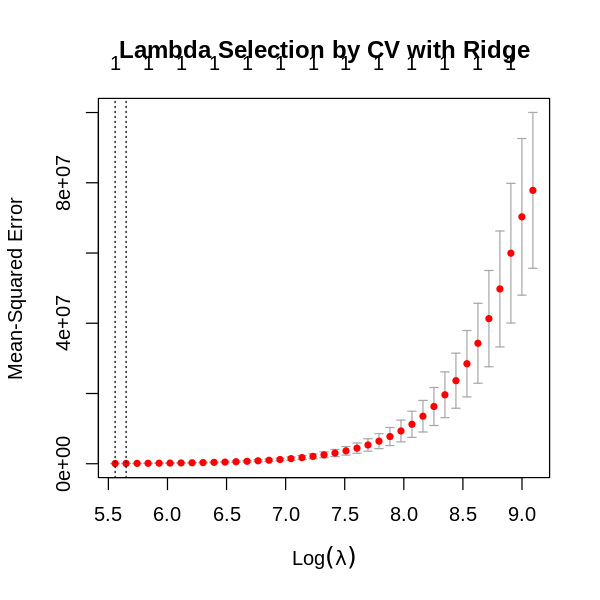

In [45]:
articles_cv_ridge <- cv.glmnet(
    x = articles_X_train %>% as.matrix(),
    y = articles_Y_train %>% as.matrix(),
    alpha = 1)
plot(articles_cv_ridge, main = 'Lambda Selection by CV with Ridge')

In [46]:
articles_cv_lambda_ridge <- cv.glmnet(
    x = articles_X_train, y = articles_Y_train,
  alpha = 0,
  lambda = exp(seq(-5, 10, 0.1)))

Next, we will use the model at the level of penalization that minimizes the CV-MSE to predict the number of shares in the test set.

In [47]:
articles_test_pred_ridge_min <- predict(articles_cv_lambda_ridge,
  newx = articles_X_test, s = "lambda.min")

After that, we will compute the  RMSE$_{test}$ using the predicted values stored in `articles_test_pred_ridge_min`.

In [49]:
articles_R_MSE_models <- tibble(
  Model = "Ridge Regression with Minimum MSE",
  R_MSE = rmse(
    preds = articles_test_pred_ridge_min,
    actuals = testing_articles$shares
  )
)
articles_R_MSE_models

Model,R_MSE
<chr>,<dbl>
Ridge Regression with Minimum MSE,0.01545711


## Interpretation

Our Ridge Regression produces a RMSE value of approximately 0.015, which represents the average squared difference between the actual and predicted number of shares. An MSE of 0.015 means our model's predicted values are reasonably close to the true values. One potential issue is that there were many outliers in our dataset with shares over 100,000, so in future analyses, we will consider including them in our sample to see if we get a smaller RMSE.
